# Part 1

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split

In [111]:
# A. Load Data
dataset = pd.read_csv("ozon.csv")
npdataset = dataset.to_numpy()
X = npdataset[:, 0:3]
Y = npdataset[:, 3]
print(dataset.head())
print(Y[0:5])

   radiation  temperature  wind  ozone
0        190           67   7.4     41
1        118           72   8.0     36
2        149           74  12.6     12
3        313           62  11.5     18
4        299           65   8.6     23
[41. 36. 12. 18. 23.]


In [112]:
# Split data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.8, random_state = 32)
print(np.shape(Ytrain))
print(np.shape(Ytest))

(88,)
(23,)


In [113]:
# Reg
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(Xtrain, Ytrain)


LinearRegression()

In [114]:
from sklearn.metrics import mean_squared_error, r2_score
train_pred = reg.predict(Xtrain)
test_pred = reg.predict(Xtest)
print('Coefficients =', reg.coef_)
print('Train error = %0.3f'% mean_squared_error(Ytrain,train_pred))
print('Test error = %0.3f'% mean_squared_error(Ytest,test_pred))

Coefficients = [ 0.06130755  1.67681488 -3.12671825]
Train error = 448.412
Test error = 372.048


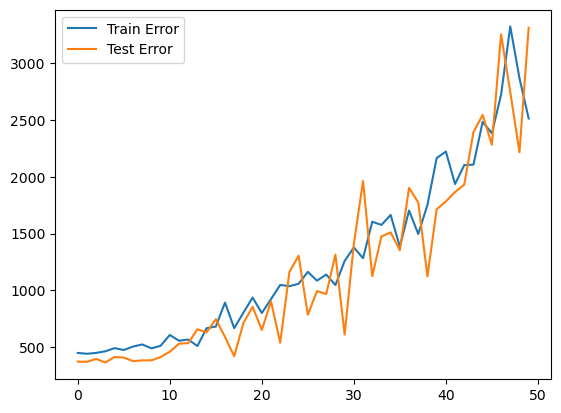

In [115]:
train_error = []
test_error = []

for i in range (50):
    var = i
    mean = 0
    noise = np.random.normal(mean, var, 111)
    temp_train = Ytrain
    temp_test = Ytest
    temp_train = temp_train + noise[0:88]
    temp_test = temp_test + noise[88:]
    reg = linear_model.LinearRegression()
    reg.fit(Xtrain, temp_train)
    train_pred = reg.predict(Xtrain)
    test_pred = reg.predict(Xtest)
    train_error.append(mean_squared_error(temp_train,train_pred))
    test_error.append(mean_squared_error(temp_test,test_pred))
   
plt.plot(np.arange(50),train_error)
plt.plot(np.arange(50),test_error)
plt.legend(['Train Error','Test Error'])

plt.show()

In [116]:
col = (Xtrain**2).reshape(88,3)
Xtr = np.append(Xtrain, col, axis=1)
print(Xtr[0,:])

col = (Xtest**2).reshape(23,3)
Xts = np.append(Xtest, col, axis=1)

[2.3800e+02 6.8000e+01 1.0300e+01 5.6644e+04 4.6240e+03 1.0609e+02]


In [117]:
reg = linear_model.LinearRegression()
reg.fit(Xtr, Ytrain)

train_pred = reg.predict(Xtr)
test_pred = reg.predict(Xts)
print('Coefficients =', reg.coef_)
print('Train error = %0.3f'% mean_squared_error(Ytrain,train_pred))
print('Test error = %0.3f'% mean_squared_error(Ytest,test_pred))

Coefficients = [ 1.19635316e-01 -7.50379045e+00 -1.39419307e+01 -1.75794905e-04
  5.84452226e-02  4.91397964e-01]
Train error = 331.891
Test error = 247.878


# **Part 2**
2.1

In [118]:
from skimage import color
from skimage import io
from skimage.transform import rescale
import matplotlib.pyplot as plt
import os
import random
video = os.listdir('surprise videos')
#videos = random.shuffle(videos)
videos = dict()
key_list = []
for i in video:
    videos[i] = os.listdir('surprise videos/' + i)
    key_list.append(i)

train_list = random.choices(key_list, k=18)
test_list = []
for i in key_list:
    if i in train_list:
        continue
    else:
        test_list.append(i)


In [119]:
count = 0
X_train = np.zeros((1000,900*1200)) #using 1000 Upper Bound
y_train = np.zeros((1000,1))
for i in train_list:
    n=0
    frames = os.listdir('surprise videos/' + i)
    for frame in frames:
        img = io.imread('surprise videos/' + i +"/"+frame)
        imgGray = color.rgb2gray(img)
        X_train[count,:] = np.reshape(imgGray,(1,900*1200))
        y_train[count,0] = n/(len(frames)-1)
        n = n+1
        count = count+1
X_train = X_train[:count,:] #Omit the following zeros
y_train = y_train[:count,:]


print(X_train.shape)
print(y_train.shape)

(338, 1080000)
(338, 1)


In [120]:
count = 0
X_test = np.zeros((1000,900*1200))
y_test = np.zeros((1000,1))
for video in test_list:
    n=0
    frames = os.listdir('surprise videos/' + video)
    for frame in frames:
        img = io.imread('surprise videos/' + video +"/"+frame)
        imgGray = color.rgb2gray(img)
        X_test[count,:] = np.reshape(imgGray,(1,900*1200)) # Mask 
        y_test[count,0] = n/(len(frames)-1)
        n = n+1
        count = count+1
X_test = X_test[:count,:]
y_test = y_test[:count,:]

print(X_test.shape)
print(y_test.shape)

(400, 1080000)
(400, 1)


In [121]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_s = regr.predict(X_train)
y_pred = regr.predict(X_test)
print(f'Train Mean squared error: {mean_squared_error(y_train , y_s)}')
print(f'Test Mean squared error: {mean_squared_error(y_test , y_pred)}')

Train Mean squared error: 9.035857149652029e-28
Test Mean squared error: 0.24313447705794877


In [122]:
count = 0
X_train = np.zeros((1000,182*125)) #using 1000 Upper Bound
y_train = np.zeros((1000,1))
for image in train_list:
    n=0
    frames = os.listdir('surprise videos/' + image)
    for frame in frames:
        img = io.imread('surprise videos/' + image +"/"+frame)
        imgGray = color.rgb2gray(img)
        imgGray = imgGray[70:-100,350:-350]
        imgGray = rescale(imgGray, 0.25, anti_aliasing=True)
        X_train[count,:] = np.reshape(imgGray,(1,182*125))
        y_train[count,0] = n/(len(frames)-1)
        n = n+1
        count = count+1
X_train = X_train[:count,:] #Omit the following zeros
y_train = y_train[:count,:]

print(X_train.shape)
print(y_train.shape)

(338, 22750)
(338, 1)


In [123]:
count = 0
X_test = np.zeros((1000,182*125))
y_test = np.zeros((1000,1))
for video in test_list:
    n=0
    frames = os.listdir('surprise videos/' + video)
    for frame in frames:
        img = io.imread('surprise videos/' + video +"/"+frame)
        imgGray = color.rgb2gray(img)
        imgGray = imgGray[70:-100,350:-350]
        imgGray = rescale(imgGray, 0.25, anti_aliasing=True)
        X_test[count,:] = np.reshape(imgGray,(1,182*125)) # Mask 
        y_test[count,0] = n/(len(frames)-1)
        n = n+1
        count = count+1
X_test = X_test[:count,:]
y_test = y_test[:count,:]

print(X_test.shape)
print(y_test.shape)

(400, 22750)
(400, 1)


In [124]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_s = regr.predict(X_train)
y_pred = regr.predict(X_test)
print(f'Train Mean squared error: {mean_squared_error(y_train , y_s)}')
print(f'Test Mean squared error: {mean_squared_error(y_test , y_pred)}')

Train Mean squared error: 1.974717111708941e-29
Test Mean squared error: 0.3383103651182931


2.2

In [128]:
from operator import index
from sklearn.decomposition import PCA
Test_MSE = []
Train_MSE = []
for i in range(100):
    pca = PCA(n_components= i+1 , svd_solver='auto', whiten=True).fit(X_train)
    X_train_n = pca.transform(X_train)
    X_test_n = pca.transform(X_test)
    regr = linear_model.LinearRegression()
    regr.fit(X_train_n,y_train)
    y_s = regr.predict(X_train_n)
    y_pred = regr.predict(X_test_n)
    Train_MSE.append(mean_squared_error(y_train , y_s))
    Test_MSE.append(mean_squared_error(y_test , y_pred))



Best Component Value =  5
Train Mean squared error:  0.06519685119478931
Minimum Test Mean squared error:  0.08928129135516087


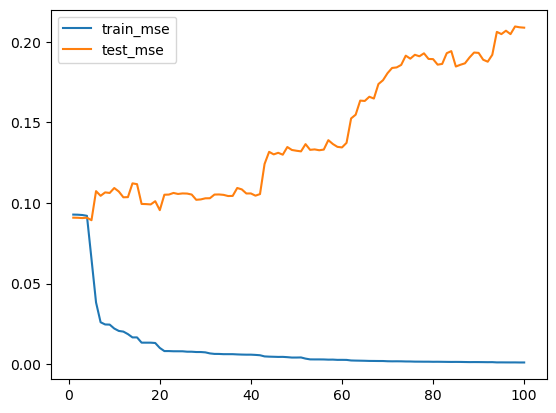

In [129]:
index = Test_MSE.index(min(Test_MSE))
print('Best Component Value = ', index+1)
print('Train Mean squared error: ' , Train_MSE[index])
print('Minimum Test Mean squared error: ' , Test_MSE[index])

x = np.arange(100) + 1
plt.plot(x,Train_MSE)
plt.plot(x,Test_MSE)
plt.legend(['train_mse', 'test_mse'])
plt.show()